In [3]:
from PyNEC import *
import numpy as np

%matplotlib notebook

The first one is supplied by the author as an example

In [4]:
#creation of a nec context
context=nec_context()

#get the associated geometry
geo = context.get_geometry()

geo.wire(     0,           36,  0,  0, 0, -0.042, 0.008, 0.017, 0.001, 1.0, 1.0)
context.geometry_complete(0)
context.gn_card(-1, 0, 0, 0, 0, 0, 0, 0)
context.ex_card(1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0)
context.fr_card(0, 2, 2400.0e6, 100.0e6)


context.rp_card(0, 361,     1, 0, 5,   0, 0,    0.0,       0.0, 1.0, 2.0,  1.0,   0.0)



In [9]:
cd /mnt/c/Users/pulse/Desktop/pingding

/mnt/c/Users/pulse/Desktop/pingding


In [10]:
from PyNEC import *
import numpy as np
import pylab as plt
%matplotlib notebook
from pingNEC import *

Wire added to geometry
Added simple frequency card
Free space parameter set


<IPython.core.display.Javascript object>


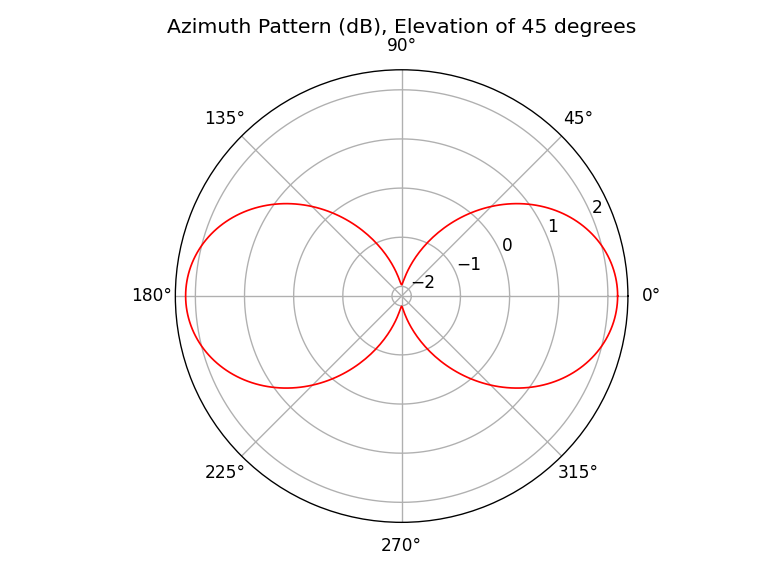

In [11]:
#creation of a nec context
context=nec_context()

# Geometry
gnc = dipole_wire_card(length=1, tagID=0)
context += gnc
context.geometry_complete(0)

ex = dipole_excitation_card(tagID=0, seg_num=50)
context += ex

sfc = simple_freq_card()
sfc.FMHZ=150
context += sfc

gfc = ground_free_card()
context += gfc

rpc = radiation_pattern_card()
rpc.n_phi=361
rpc.n_theta=181
context += rpc
plt.figure()
azimuth_polar_plot(context, thetaIdx=45, tagID=0)

In [84]:
rp = context.get_radiation_pattern(0)

In [85]:
gains_db = rp.get_gain()
gains = 10.0**(gains_db / 10.0)
thetas = rp.get_theta_angles() * np.pi / 180
phis = rp.get_phi_angles() * np.pi / 180

<IPython.core.display.Javascript object>


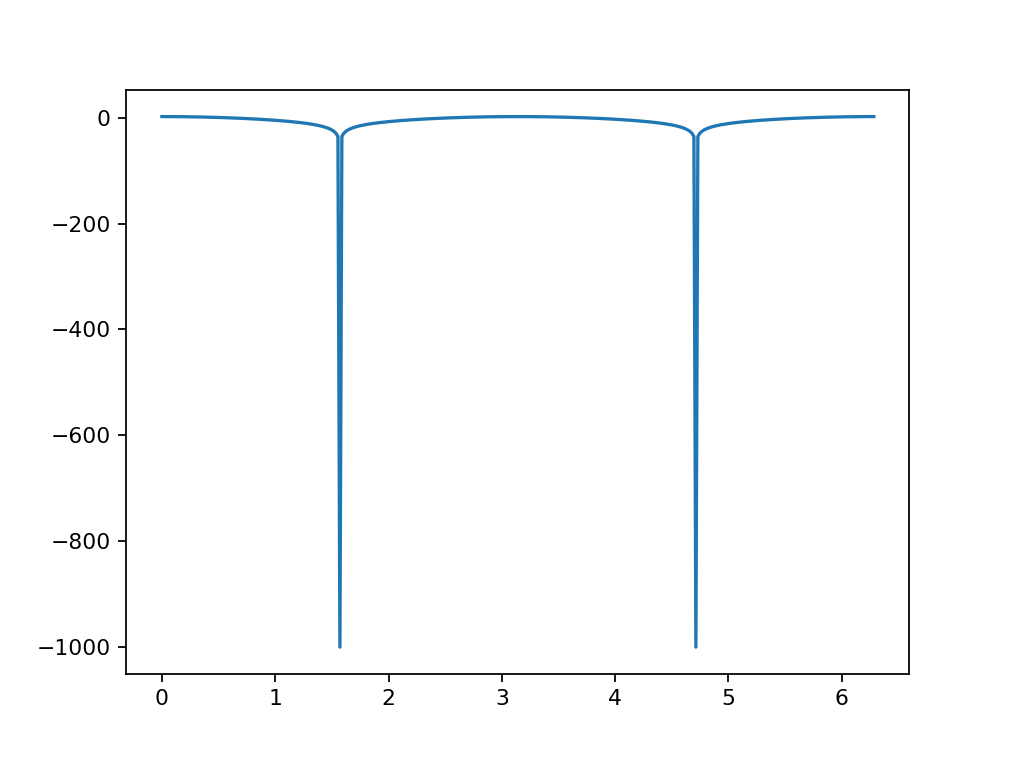

In [86]:
import pylab as plt
plt.figure()
plt.plot(phis, gains_db[90,:])

In [13]:
gains.shape,thetas.shape, phis.shape

((180, 360), (180,), (360,))

In [ ]:
import pylab as plt
plt.figure()
plt.plot(rp.get_gain_horiz())

In [ ]:
rp.get_frequency()/1e6

In [87]:
vals_phi, vals_theta = np.meshgrid(phis, thetas)


In [88]:
def spheric2cartesian(r, theta, phi):
    x = r*np.cos(theta) * np.sin(phi)
    y = r*np.sin(theta) * np.sin(phi)
    z= r*np.cos(phi)
    return x, y, z

In [89]:
R=[[yy if yy>gains_db.min() else 0 for yy in xx] for xx in gains_db]
X,Y,Z = spheric2cartesian(gains, vals_theta, vals_phi)

<IPython.core.display.Javascript object>


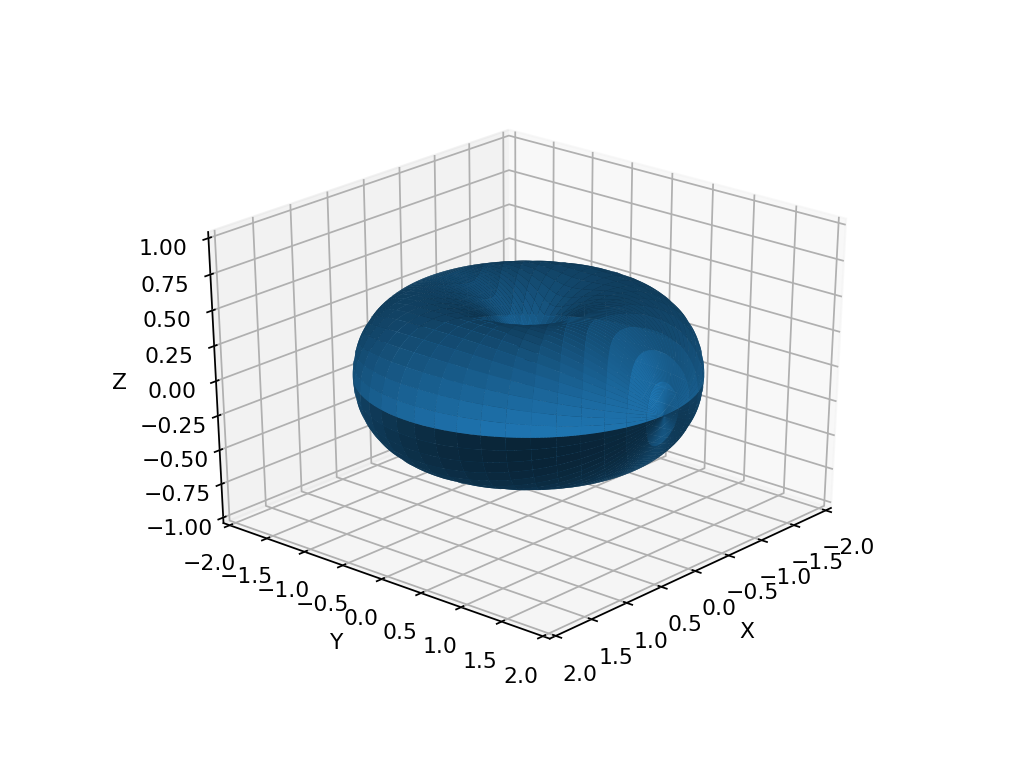

(-2.0, 2.0)

In [91]:


fig = plt.figure()

ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X,Z, Y)
#ax.scatter(X,Y,Z,s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(-2,2)
ax.set_zlim(-1,1)
ax.set_ylim(-2,2)

In [37]:
gains_db.max(), gains_db.min()

(2.197933906033607, -999.99)

In [55]:
for xx in gains_db:
    for yy in xx:
        if yy == gains_db.min():
            gains_db[xx,yy]=0

IndexError: arrays used as indices must be of integer (or boolean) type

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])